In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import NHS Prescribing Cost Analysis (PCA) data from Jan 2011, Jan 2021

In [5]:
jan_21 = pd.read_excel('assets/PCA_Jan_21.xlsx', header=2)
jan_11 = pd.read_excel('assets/PCA_Jan_11.xls', header=1)

### Data cleaning

In [9]:
jan_21 = jan_21.drop(['BNF Code',
                      'Preparation Class',
                      'Items of which Class 2',
                      'Quantity of which Class 2',
                      'Net Ingredient Cost of which Class 2 (£)'], axis=1)

In [10]:
jan_11 = jan_11.drop(['BNF Code',
                      'Preparation Class',
                      'Standard Quantity Unit',
                      'Items of which Class 2',
                      'Quantity of which Class 2',
                      'Net Ingredient Cost of which Class 2 (p)'], axis=1)

In [11]:
# Converting Net Ingredient Cost from p to £ in PCA data from Jan 2011 

jan_11['Net Ingredient Cost (£)'] = jan_11['Net Ingredient Cost (p)'] / 100
jan_11 = jan_11.drop('Net Ingredient Cost (p)', axis=1)

In [12]:
# Extracting top 15 most dispensed drug classes

jan_21_grouped = jan_21.groupby('BNF Section Name').agg({'Item Dispensed': 'sum'})
jan_21_top15 = jan_21_grouped.sort_values('Item Dispensed', ascending=False)
jan_21_top15 = jan_21_top15.iloc[:15]

jan_11_grouped = jan_11.groupby('BNF Section Name').agg({'Items Dispensed': 'sum'})
jan_11_top15 = jan_11_grouped.sort_values('Items Dispensed', ascending=False)
jan_11_top15 = jan_11_top15.iloc[:15]

In [13]:
# Making drug class names consistent in Jan 2011/2021

jan_21_top15 = jan_21_top15.reset_index(drop=True)
jan_21_top15 = jan_21_top15.rename(index={0: 'Antidepressant Drugs',
                                          1: 'Lipid-Regulating Drugs',
                                          2: 'Hypertension and Heart Failure',
                                          3: 'Antisecretory Drugs & Mucosal Protectants',
                                          4: 'Analgesics',
                                          5: 'Drugs Used In Diabetes',
                                          6: 'Nitrates, Calcium-Channel Blockers & Other Antianginal Drugs',
                                          7: 'Beta-Adrenoceptor Blocking Drugs',
                                          8: 'Thyroid And Antithyroid Drugs',
                                          9: 'Vitamins',
                                          10: 'Antiplatelet Drugs',
                                          11: 'Antiepileptic Drugs',
                                          12: 'Bronchodilators',
                                          13: 'Antibacterial Drugs',
                                          14: 'Diuretics'})

In [14]:
jan_11_top15 = jan_11_top15.reset_index(drop=True)
jan_11_top15 = jan_11_top15.rename(index={0: 'Analgesics',
                                          1: 'Hypertension & Heart Failure',
                                          2: 'Lipid-Regulating Drugs',
                                          3: 'Antibacterial Drugs',
                                          4: 'Antidepressant Drugs',
                                          5: 'Antisecretory Drugs & Mucosal Protectants',
                                          6: 'Nitrates, Calcium-Channel Blockers & Other Antianginal Drugs',
                                          7: 'Drugs Used In Diabetes',
                                          8: 'Antiplatelet Drugs',
                                          9: 'Diuretics',
                                          10: 'Beta-Adrenoceptor Blocking Drugs',
                                          11: 'Bronchodilators',
                                          12: 'Thyroid And Antithyroid Drugs',
                                          13: 'Drugs Used In Rheumatic Diseases & Gout',
                                          14: 'Vitamins'})

In [16]:
jan_11_top15.index.name = 'BNF Section Name'
jan_21_top15.index.name = 'BNF Section Name'

jan_11_top15 = jan_11_top15.reset_index()
jan_21_top15 = jan_21_top15.reset_index()

### Plotting data 

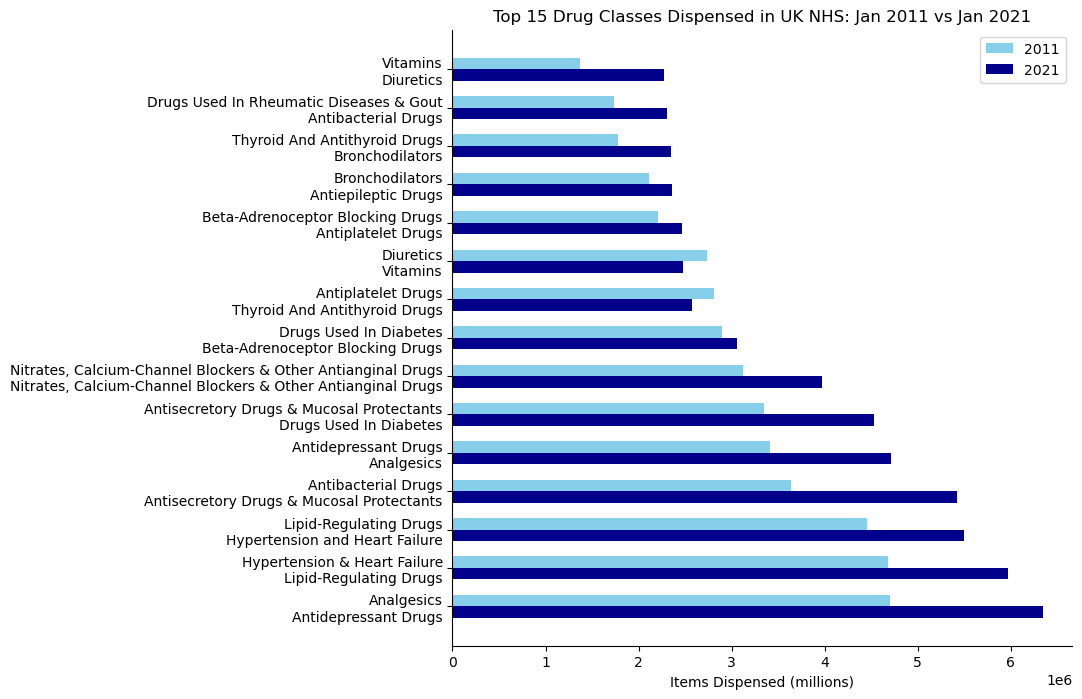

In [17]:
plt.figure(figsize=(8,8))
ax = plt.gca()

# plotting top subplot
pos1 = np.arange(len(jan_11_top15))
pos2 = pos1 + 0.3

plt.barh(pos2, jan_11_top15['Items Dispensed'], color='skyblue', height=0.3, label = '2011');
plt.barh(pos1, jan_21_top15['Item Dispensed'],color='darkblue', height=0.3, label='2021');

middle = (pos1 + pos2) / 2
labels = [f'{b11}\n{b21}' for b11, b21 in zip(jan_11_top15['BNF Section Name'], jan_21_top15['BNF Section Name'])]

#plt.set_xticks(middle)
ax.set_yticks(middle)
ax.set_yticklabels(labels, rotation=0)
plt.legend();

# Decorating plot
ax.set_title('Top 15 Drug Classes Dispensed in UK NHS: Jan 2011 vs Jan 2021')
ax.set_xlabel('Items Dispensed (millions)')
ax.spines[['top', 'right']].set_visible(False)

plt.show()